INTRODUCTION AND HISTORY TO ALEX NET

AlexNet is the name of a convolutional neural network (CNN) architecture, designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton, who was Krizhevsky's Ph.D. advisor. AlexNet competed in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012.The network achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up. The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of graphics processing units (GPUs) during training. AlexNet was not the first fast GPU-implementation of a CNN to win an image recognition contest. A CNN on GPU by K. Chellapilla et al. (2006) was 4 times faster than an equivalent implementation on CPU.A deep CNN of Dan Cireșan et al. (2011) at IDSIA was already 60 times faster and achieved superhuman performance in August 2011.Between May 15, 2011 and September 10, 2012, their CNN won no fewer than four image competitions.They also significantly improved on the best performance in the literature for multiple image databases.

Implementing AlexNet is more straightforward than implementing LeNet-because the architecture elements are in line with modern neural networks.

The main innovation introduced by AlexNet compared to the LeNet-5 was its sheer size. AlexNet main elements are the same: a sequence of convolutional and pooling layers followed by a couple of fully-connected layers. The LeNet-5 has two sets of convolutional and pooling layers, two fully-connected layers, and an RBD classifier as an output layer. AlexNet has five convolutional layers, three pooling layers, two fully-connected layers, and a softmax classifier output layer. The training time and dataset were larger as well. All of this was possible thanks to the availability of more computational processing power (particularly Graphics Processing Units (GPUs)), and larger datasets (because of the internet). There a few additional innovations introduced with AlexNet:

Rectifier Linear Units (ReLU): instead of the hyperbolic tangent (tanh) and sigmoid units. ReLUs train several times faster than tanh or sigmoid units. Normalization layers: aimed to reduce overfitting. More on this latter. Dropout layers: dropout consists of setting to zero the output of a hidden neuron with some probability, in this case, 0.5. Also aimed to help with overfitting. Data augmentation: images were artificially translated, reflected, and distorted to increase the dataset size. The more variation in training examples, the more information available for the model to learn.

In [1]:
#importing dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
from keras.utils import np_utils
from keras.optimizers import adam_v2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
from keras import backend as K
from keras.models import load_model

In [2]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

AlexNet model architecture in Keras
Here is where we ensemble AlexNet architecture as shown (as closely as possible) in Figure 7. The comments explain each step in the model definition.

Since we are usin CIFAR-10 32x32 images instead of the 224x224 ImageNet images, “padding” will be necessary in several layers so dimensions match. Normally we will use kernels with different dimensions for CIFAR-10 but I’m opting for padding to recreate AlexNet as closely as possible.

In [3]:
#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [4]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

since im ready with my model,i checked its performance in classification.I will use the CIFAR10 dataset that is a popular benchmark in image classification. The CIFAR-10 dataset is a publically available image data set provided by the Canadian Institute for Advanced Research (CIFAR). It consists of 60000 32×32 colour images in 10 classes, with 6000 images per class. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 50000 training images and 10000 test images in this dataset.



In [5]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [6]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


One-hot encoding of the target vectori.e.i need to reshape the target vector

In [7]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))




((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [8]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

After preprocessing the CIFAR10 dataset, we are ready now to train our defined AlexNet model. We will use the learning rate annealer in this experiment. The learning rate annealer decreases the learning rate after a certain number of epochs if the error rate does not change. Here, through this technique, we will monitor the validation accuracy and if it seems to be a plateau in 3 epochs, it will reduce the learning rate by 0.01.

In [9]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

To train the model,i had to define below the number of epochs, the number of batches and the learning rate.

In [10]:
#Defining the parameters
batch_size= 250
epochs=50
learn_rate=.001

In [ ]:
#Training the model
AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


140/140 [==============================] - 616s 4s/step - loss: 1.6293 - accuracy: 0.4204 - val_loss: 2.1407 - val_accuracy: 0.2023 - lr: 0.0010
Epoch 2/50
140/140 [==============================] - 568s 4s/step - loss: 1.3972 - accuracy: 0.5121 - lr: 0.0010
Epoch 3/50
140/140 [==============================] - 592s 4s/step - loss: 1.2794 - accuracy: 0.5582 - lr: 0.0010
Epoch 4/50
140/140 [==============================] - 579s 4s/step - loss: 1.1937 - accuracy: 0.5915 - lr: 0.0010
Epoch 5/50
 22/140 [===>..........................] - ETA: 8:06 - loss: 1.1085 - accuracy: 0.6242

NameError: ignored

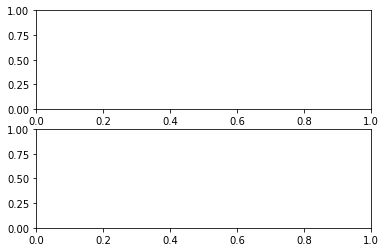

In [1]:
#After successful training, we will visualize its performance.

import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()


In [ ]:
score = AlexNet.evaluate(x_test, y_test, verbose=0)
print(f'Test loss score: {score[0]}')
print(f'Test accuracy score:{ score[1]}')